# DTSA 5509 Supervised Learning Final Project - Income Exceeds \\$50K/yr

### Project Topic
This project's aim is to predict whether a person's income exceeds \$50K/yr based off of data collected from the USA census. The original problem and dataset was created and extracted by Barry Becker and Ronny Kohavi in 1996. 

The type of problem is: !!!!

The type of learning/algorithm is: !!!!

The type of task is: !!!!

The goal for me picking this project and developing a model to help predict whether a person's income exceeds \\$50K/year is to understand if there are any correlations to interpret bias and fairness. There is a lot of information about salary fairness and I would like to understand what are the leading features toward determining a person's income.  I would also like to develop a model that could most accurately predict whether a person would make more \\$50K/year.  This would be helpful in determining whether others are being over or underpaid.

In [2]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

### Data
Citation:

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

This data was found by searching in the UC Irvine Machine Learning Repository at https://archive.ics.uci.edu/. I chose this data set because I thought there was a clear problem to investigate and it met the criteria for the project.

As mentioned above the data was extracted from the 1996 US Census using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

In order to download the data, I followed the instructions on the webpage. First I had to install ucimlrepo:

In [3]:
!pip3 install -U ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


Then, I extracted the data using the "Import in Python" option from: https://archive.ics.uci.edu/dataset/2/adult

Upon doing so, it gave me the information below.

In [4]:
#Copied Import in Python Code

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

The data itself is predived into dataframes: X and y.

X has 14 features that include: 

age: age in years

workclass: idustry or section works in 

fnlwgt: estimate of the number of individuals in the US that have the same demographics

education: highest level of education graduated

education-num: (Education level 1 -16 which is the integer of education in order of progression)

marital-status

occupation: broadly based on census

relationship

race

sex

capital-gain: capitial gain of the previous year

capital-loss: capital loss of the previous year

hours-per-week: hours worked per week

native-country: country of birth

y has income: >50K or <=50K

Convieniently, the information provided from the download also indicates which features have missing values. These include: 'workclass', 'occupation', and 'native-country'

To learn more about the missing values and information I will look at the info and see what unique values exist in each feature.

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [6]:
for c in X.columns[1:]:
    print(c, X[c].unique())
print('income', y['income'].unique())

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
fnlwgt [ 77516  83311 215646 ... 173449  89686 350977]
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]
relationship ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex ['Male' 'Femal

### Data Cleaning

From the information, I can see that there are indeed nulls in 'workclass', 'occupation', and 'native-country'.

There are also '?' elements in 'workclass', 'occupation', and 'native-country'.

Finally, income has some unwanted periods: ['<=50K' '>50K' '<=50K.' '>50K.']

In [7]:
print("Null count:")
X.isnull().sum()

Null count:


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [8]:
print("workclass '?' count: ", (X['workclass'].values == '?').sum())
print("occupation '?' count: ", (X['occupation'].values == '?').sum())
print("native-country '?' count: ", (X['native-country'].values == '?').sum())

workclass '?' count:  1836
occupation '?' count:  1843
native-country '?' count:  583


While there are quite a few data that have null or '?' values, I am choosing to remove them as the data set is fairly large in comparision.  The features that contain these missing or unknown values are categorical, so I cannot replace them with an average or something of that nature.  Also, I cannot change these values into 'unknown', because given the nature of the categories, we would not know if for example the occupation was unknown, the individual doesn't have one, or it doesn't fall into one of these categories.  Therefore, it would be safer to just remove them.  This will be noted in the conclusion.

In [9]:
#Combine X and y

df = pd.concat([X, y], axis=1)

In [10]:
# Remove data with missing values

df_clean = df.dropna()

In [11]:
# Remove data with '?' values

df_clean = df_clean[df_clean['workclass'].values != '?']
df_clean = df_clean[df_clean['occupation'].values != '?']
df_clean = df_clean[df_clean['native-country'].values != '?']

In [12]:
# Check size of remaining data

df_clean.shape

(45222, 15)

In [13]:
#Clean income

df_clean = df_clean.replace('<=50K.', '<=50K')
df_clean = df_clean.replace('>50K.', '>50K')

Next, I am going to remove duplicate features.  

'education' and 'education-num' are saying the same thing. I am getting rid of 'education' and keeping 'education-num' as it organizes the highest education level, providing a more robust data metric.

In [14]:
df_clean = df_clean.drop(columns=['education'])

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


### Exploratory Data Analysis

First let's start by gettign a summary of the data.

In [19]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Let's look at some histogram plots of the numerical features.

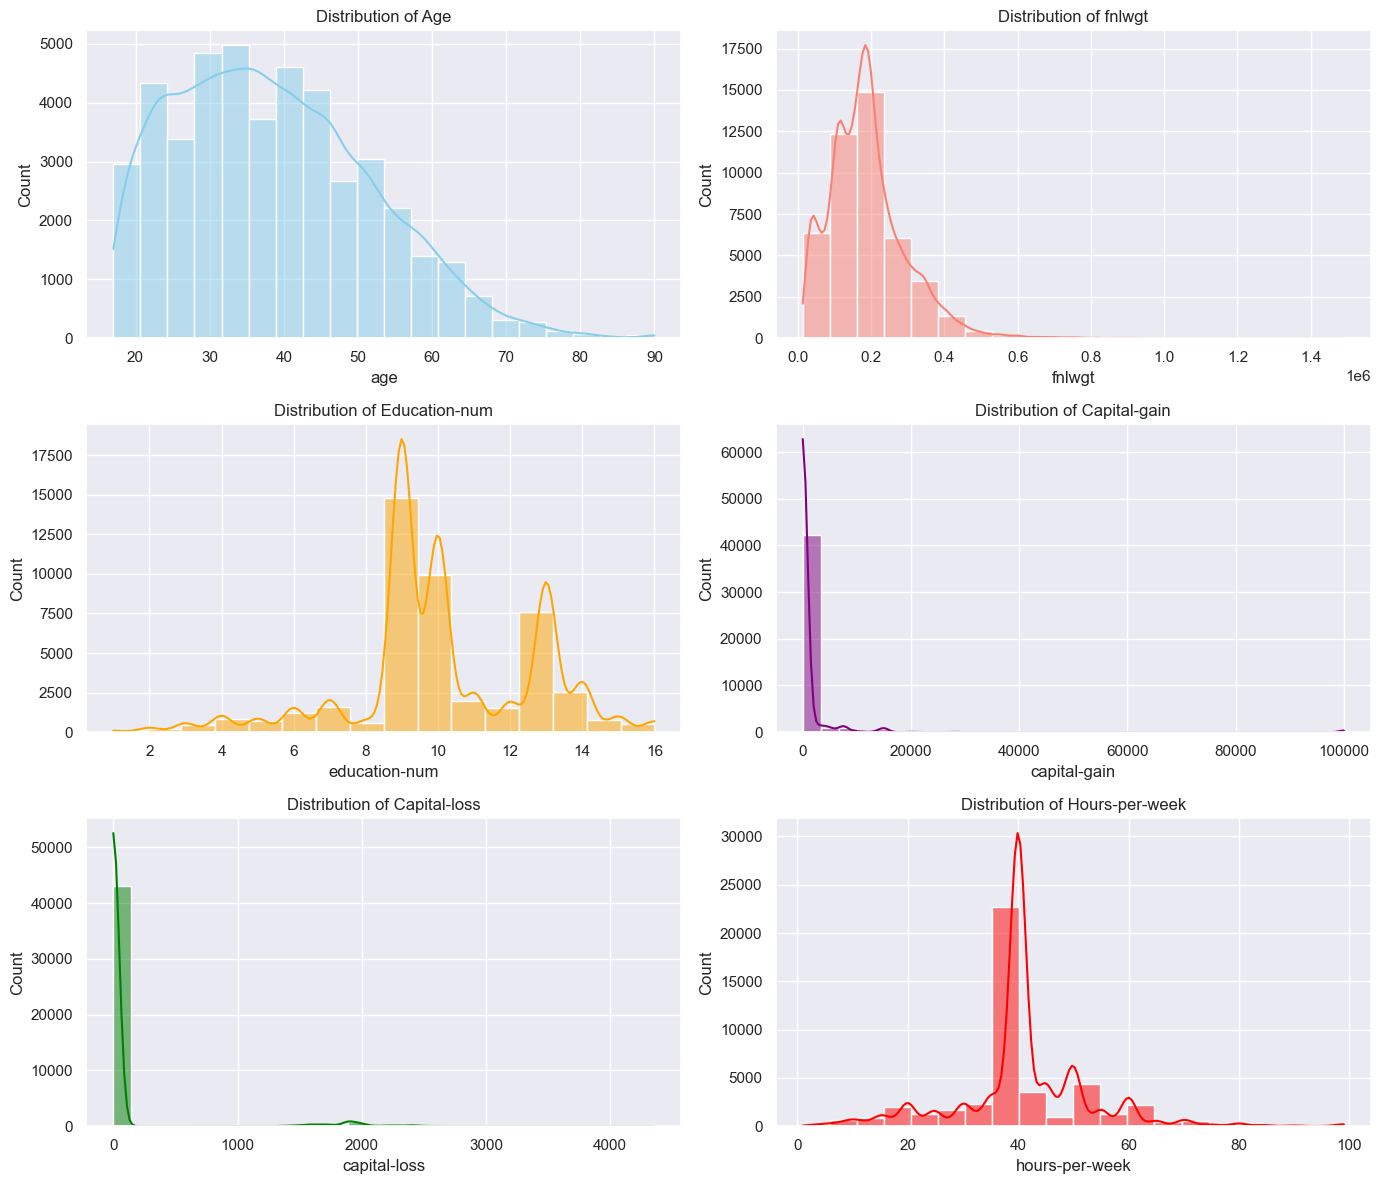

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

sns.histplot(df_clean['age'], bins=20, ax=ax[0, 0], kde=True, color='skyblue')
ax[0, 0].set_title('Distribution of Age')

sns.histplot(df_clean['fnlwgt'], bins=20, ax=ax[0, 1], kde=True, color='salmon')
ax[0, 1].set_title('Distribution of fnlwgt')

sns.histplot(df_clean['education-num'], bins=16, ax=ax[1, 0], kde=True, color='orange')
ax[1, 0].set_title('Distribution of Education-num')

sns.histplot(df_clean['capital-gain'], bins=30, ax=ax[1, 1], kde=True, color='purple')
ax[1, 1].set_title('Distribution of Capital-gain')

sns.histplot(df_clean['capital-loss'], bins=30, ax=ax[2, 0], kde=True, color='green')
ax[2, 0].set_title('Distribution of Capital-loss')

sns.histplot(df_clean['hours-per-week'], bins=20, ax=ax[2, 1], kde=True, color='red')
ax[2, 1].set_title('Distribution of Hours-per-week')

plt.tight_layout()
plt.show()

Looking at the histograms, age, capital-gain, capital-loss, and hours-per-week have a wide range of values. The features age, fnlwgt, capital-gain, and capital-loss look to be skewed to the right.

Next, I'll look at the categorical feature distribution.

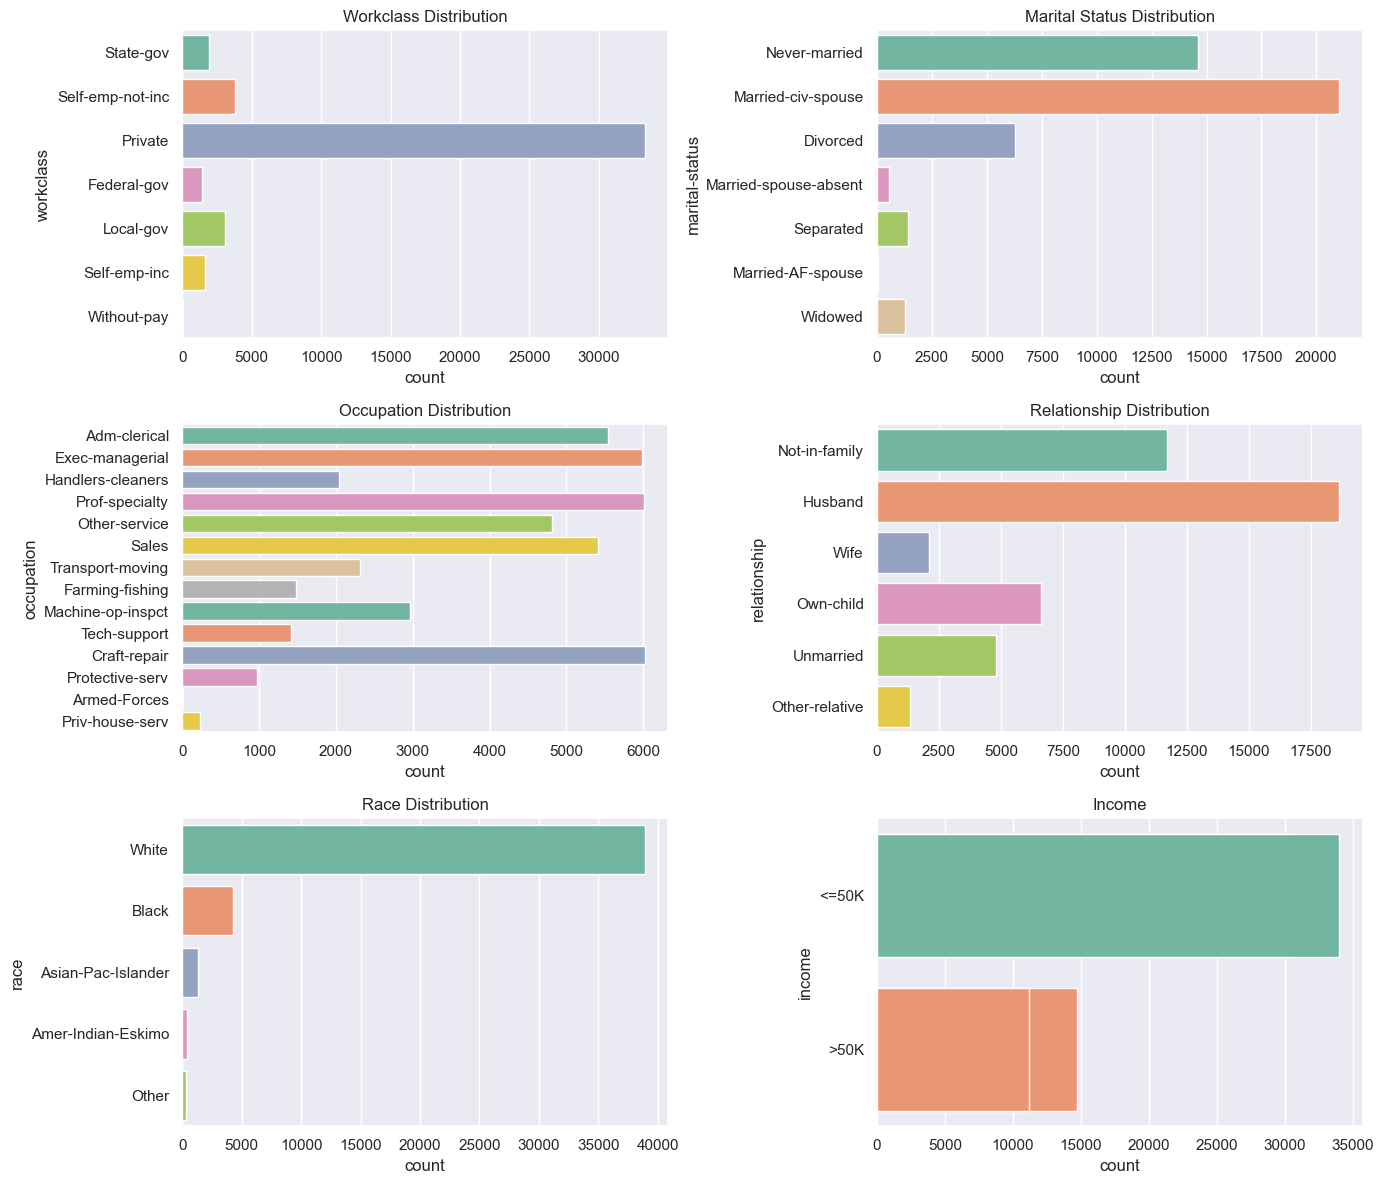

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

sns.countplot(y='workclass', data=df_clean, ax=ax[0, 0], palette='Set2')
ax[0, 0].set_title('Workclass Distribution')

sns.countplot(y='marital-status', data=df_clean, ax=ax[0, 1], palette='Set2')
ax[0, 1].set_title('Marital Status Distribution')

sns.countplot(y='occupation', data=df_clean, ax=ax[1, 0], palette='Set2')
ax[1, 0].set_title('Occupation Distribution')

sns.countplot(y='relationship', data=df_clean, ax=ax[1, 1], palette='Set2')
ax[1, 1].set_title('Relationship Distribution')

sns.countplot(y='race', data=df_clean, ax=ax[2, 0], palette='Set2')
ax[2, 0].set_title('Race Distribution')

sns.countplot(y='sex', data=df_clean, ax=ax[2, 1], palette='Set2')
ax[2, 1].set_title('Sex Distribution')

sns.countplot(y='income', data=df_clean, ax=ax[2, 1], palette='Set2')
ax[2, 1].set_title('Income')

plt.tight_layout()
plt.show()

The all categorical features except for occupation have categories that are much more prevelant than others.

Next I will do a correlation matrix.

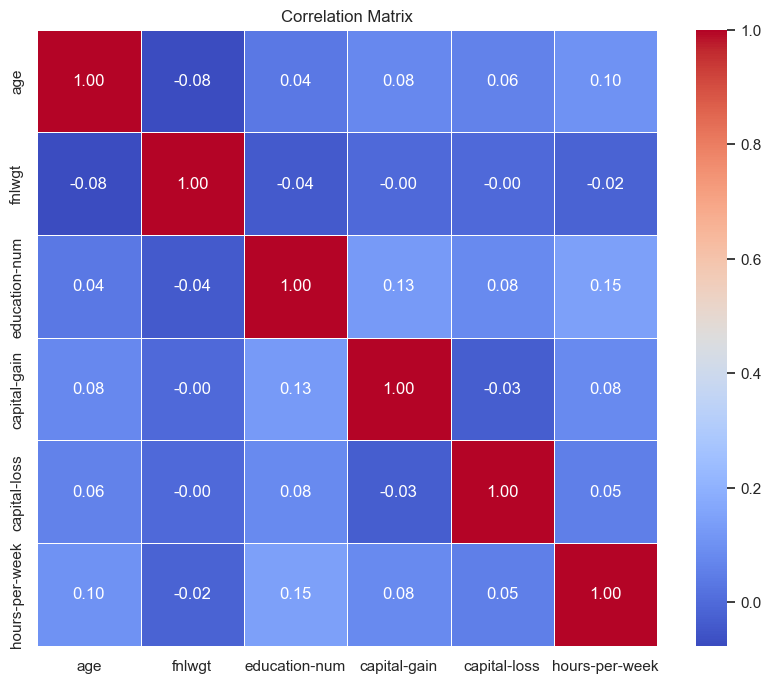

In [22]:
corr_matrix = df_clean[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Looking at the correlation matrix, non of the numerical features seem to be strongly related.

Next, we can do a feature importance and relationship plot which will help when analyzing relationships between features.

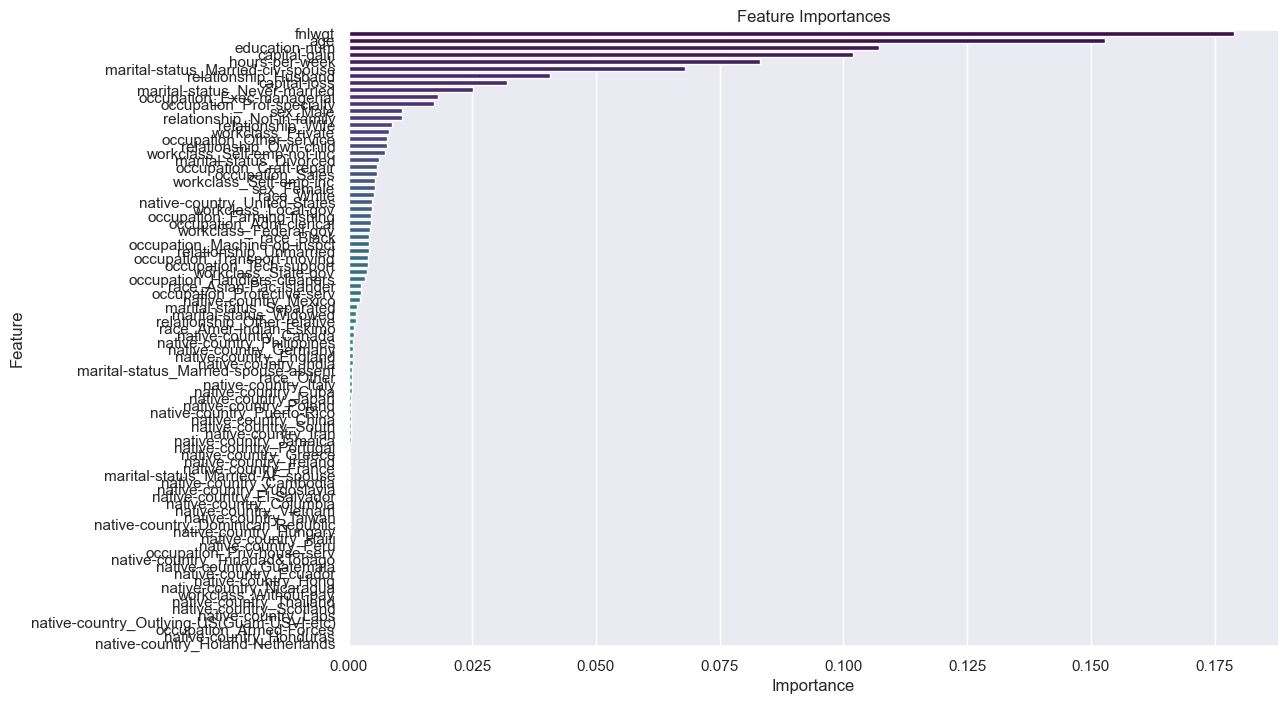

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Preparing data for feature importance
X_features = pd.get_dummies(df_clean.drop(columns='income'))
y_target = df_clean['income'].map({'<=50K': 0, '>50K': 1})

# Fitting RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_features, y_target)

# Extracting feature importances
importances = model.feature_importances_
feature_names = X_features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

In [27]:
print(importance_df.head(10))
print(importance_df.tail(10))

                              Feature  Importance
1                              fnlwgt    0.178943
0                                 age    0.152810
2                       education-num    0.107158
3                        capital-gain    0.101891
5                      hours-per-week    0.083136
15  marital-status_Married-civ-spouse    0.067921
34               relationship_Husband    0.040627
4                        capital-loss    0.032049
17       marital-status_Never-married    0.025086
23         occupation_Exec-managerial    0.018055
                                      Feature    Importance
63                        native-country_Hong  1.241408e-04
73                   native-country_Nicaragua  1.212278e-04
12                      workclass_Without-pay  1.134822e-04
83                    native-country_Thailand  8.191119e-05
80                    native-country_Scotland  7.773356e-05
71                        native-country_Laos  7.726044e-05
74  native-country_Outlying-US

From the data above we can see the most and least important features for the model for a Random Forrest Classifier.  This is one of the better discriptors for us because it directly relates to the type of data and how we are going to develop our models.  Features like education-num, capital_gain, and hours-per-week make sense when looking to see if someone will have an income greater than 50K.

Some challenges when interpretting the data will be that the distribution of the income classes may be imbalanced.  Also, the handling of the categorical features and interactions will need to be considered.

### Models

First, I need to separate X, and y.  Then, I need to change income to '<=50K': 0, '>50K': 1.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Example DataFrame
df = df_clean

# Define features and target
X = df.drop(columns=['income'])
y = df['income']

# Encoding target variable
y = y.map({'<=50K': 0, '>50K': 1})

# Define categorical features
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Create a ColumnTransformer for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Preprocess the features
X_preprocessed = preprocessor.fit_transform(X)

First, I'll split the data.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

#### Decision Tree (no reg)

Next I'll make a Decision Tree and fit the data.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print(precision_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))


0.618770037889828
0.6292234736218139
0.8113805557603008


#### Random Forest

Next I'll make a Random Forest and fit the data.

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(precision_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

0.7452161587526577
0.6232957913455839
0.853320557234466


#### Hyperparameter Tuning

Use GridSearchCV to find the best hyperparameters

In [46]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:")
print(grid_search_rf.best_params_)
print("Best score:")
print(grid_search_rf.best_score_)

Best parameters for Random Forest:
{'max_depth': 20, 'n_estimators': 200}
Best score:
0.8602748380982467


### Results and Analysis

1. Decision Tree Model
Performance Metrics:

Precision: 0.619

Recall: 0.629

Accuracy: 0.811

Analysis:

Precision (0.619) indicates that when the model predicts the positive class, it is correct approximately 62% of the time. Precision is a measure of the model's ability to avoid false positives.
Recall (0.629) shows that the model identifies about 63% of the actual positive cases. Recall is a measure of how well the model captures all the positive cases.
Accuracy (0.811) is the overall percentage of correct predictions, which includes both true positives and true negatives. The model has a relatively high accuracy, indicating good performance in general.

Decision Tree Characteristics:

Decision Trees can be prone to overfitting, especially if not pruned or limited in depth. Given the high accuracy but somewhat lower precision and recall, it’s worth exploring if pruning or more regularization could improve the model further.

2. Random Forest Model
Performance Metrics:

Precision: 0.745

Recall: 0.623

Accuracy: 0.853

Analysis:

Precision (0.745) is significantly higher than that of the Decision Tree, suggesting that the Random Forest is better at correctly identifying positive cases when it predicts them.
Recall (0.623) is similar to that of the Decision Tree, meaning that the Random Forest captures a similar proportion of actual positive cases.
Accuracy (0.853) is higher than that of the Decision Tree, indicating that the Random Forest model has better overall performance.

Random Forest Characteristics:

Random Forests, being an ensemble of Decision Trees, typically offer better performance and robustness compared to a single Decision Tree. They are less prone to overfitting due to averaging multiple trees.

3. Hyperparameter Tuning for Random Forest

Best Parameters:

max_depth: 20

n_estimators: 200

Best Score:

Accuracy: 0.860

Analysis:

The hyperparameter tuning with GridSearchCV suggests that increasing the number of trees (n_estimators) and setting a maximum depth (max_depth) improves the model's performance. With these parameters, the Random Forest model achieves a higher accuracy of 0.860, which is an improvement over the initial model's accuracy of 0.853.
The increase in accuracy indicates that the model benefits from deeper trees and more trees in the forest, capturing more complex patterns in the data without significant overfitting.

Summary:

Decision Tree:

Precision and recall are moderate, with a good overall accuracy. However, there’s potential to improve precision or recall with further tuning or regularization.
Random Forest:

Shows improved precision and accuracy over the Decision Tree model. It’s more robust and performs better in distinguishing between classes.
Hyperparameter Tuning:

Optimizing n_estimators and max_depth enhances the Random Forest model’s performance, showing the importance of hyperparameter tuning in achieving the best results.

### Discussion and Conclusion

The Random Forest model with hyperparameter tuning provides the best performance among the models evaluated. The results highlight the following key points:

Model Performance: The Random Forest model, particularly with tuned hyperparameters, shows superior performance in precision and accuracy compared to the Decision Tree. This suggests that for this dataset, the Random Forest’s ensemble approach is more effective in distinguishing between classes and making accurate predictions.

Decision Tree Insights: While the Decision Tree model offers a simpler and more interpretable approach, its lower precision and recall indicate limitations that can be addressed by using more advanced models or techniques such as ensemble methods.

Importance of Hyperparameter Tuning: The improvement in accuracy with tuned hyperparameters underscores the importance of optimizing model settings to achieve the best results. For Random Forest, this involves adjusting the number of estimators and the depth of the trees.

The model I created with Random Forest model with hyperparameter tuning helps predict whether a person's salary will be over or under $50K/year with a high accuracy.  The features that contribute most are fnlwgt, age, education-num, 
                              fnlwgt    
                                 age    
                       education-num    
                        capital-gain    
                      hours-per-week    
   marital-status_Married-civ-spouse    
                relationship_Husband    
                        capital-loss    
        marital-status_Never-married    
          occupation_Exec-managerial  

Recommendations for Further Work:

Model Comparison: Evaluate additional models such as Gradient Boosting Machines (GBM) and Support Vector Machines (SVM) to identify if they can provide better performance or insights.

Cross-Validation: Implement cross-validation to ensure that model performance is consistent across different subsets of the data, which can help in generalizing the findings.

Feature Engineering: Explore further feature engineering techniques to improve model performance, such as creating interaction terms or incorporating domain-specific features.

In summary, the Random Forest model with the optimized hyperparameters is the most effective approach for this problem, but continuous evaluation and tuning, along with exploration of other models and techniques, will be crucial for achieving the best results.